# Lesson 8 - Source Sheet

A source sheet is an infinite row of sources along one line

In [75]:
# import resources notebook
%run resources.ipynb

In [76]:
# create mesh grid
N = 100
x_start, x_end = -1.0, 1.0
y_start, y_end = -1.5, 1.5
x, y = np.linspace(x_start, x_end), np.linspace(y_start, y_end)
X, Y = np.meshgrid(x, y)

In [77]:
# create freestream
u_inf = 1.0
alpha = 0.0

fs = Freestream(u_inf, alpha)
fs.velocity(X, Y)
fs.stream_function(X, Y)

## Finite number of sources along a line

In [78]:
N_sources = 11
strength = 5.0
strength_source = strength/N_sources
x_source = np.zeros(N_sources, dtype=float)
y_source = np.linspace(-1.0, 1.0, N_sources)

# create a source line
sources = np.empty(N_sources, dtype=object)
for i in range(N_sources):
    sources[i] = SourceSink(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)
    
# superposition
u = fs.u.copy()
v = fs.v.copy()
for source in sources:
    u += source.u
    v += source.v

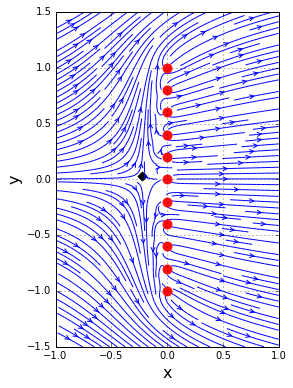

In [79]:
# plot the streamlines
size = 4
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# plot the sources
plt.scatter(x_source, y_source, color='#FF0D0D', s=80, marker='o')

# compute the velocity magnitude and indices of the stagnation point
magnitude = np.sqrt(u**2 + v**2)
j_stag, i_stag = np.unravel_index(magnitude.argmin(), magnitude.shape)

# plot stagnation point
plt.scatter(x[i_stag], y[j_stag], color='black', s=40, marker='D')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end);

*Challenge question*: What is the minimum total source strength so that the dividing streamline encloses all the singularities?

## Infinite line of sources

define $s$ as running coordinate along sheet.

$$\sigma = \sigma\left(s\right)$$

$$d\psi\left(r,\theta\right) = \frac{\sigma ds}{2\pi}\theta$$

$$\psi\left(r,\theta\right) = \frac{\sigma}{2\pi}\int_\text{sheet}\theta\left(s\right)ds$$

stream function:
$$\psi\left(x,y\right) = \frac{\sigma}{2\pi}\int_{y_{min}}^{y_{max}}\tan^{-1}\left(\frac{y-\xi}{x}\right)d\xi$$

velocity:
$$u\left(x,y\right) = \frac{\sigma}{2\pi}\int_{y_{min}}^{y_{max}}\frac{x}{x^2 + \left(y-\xi\right)^2}d\xi$$

$$v\left(x,y\right) = \frac{\sigma}{2\pi}\int_{y_{min}}^{y_{max}}\frac{y-\xi}{x^2 + \left(y-\xi\right)^2}d\xi$$

In [80]:
from scipy import integrate

In [81]:
print(integrate.quad(lambda x: x**2, 0.0, 1.0))

(0.33333333333333337, 3.700743415417189e-15)


In [82]:
# sheet strength
sigma = 2.5

# sheet boundaries
y_min, y_max = -1.0, 1.0

# create the anonymous functions
integrand_u = lambda s, x, y: x/(x**2 +(y-s)**2)
integrand_v = lambda s, x, y: (y-s)/(x**2 + (y-s)**2)

# create a dummy function to vectorize
def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x,y))[0]

vec_integration = np.vectorize(integration)

# compute the source sheet velocity field
u_sheet = sigma/(2*np.pi)*vec_integration(X, Y, integrand_u)
v_sheet = sigma/(2*np.pi)*vec_integration(X, Y, integrand_v)

# superposition with free stream
u = u_sheet + fs.u
v = v_sheet + fs.v

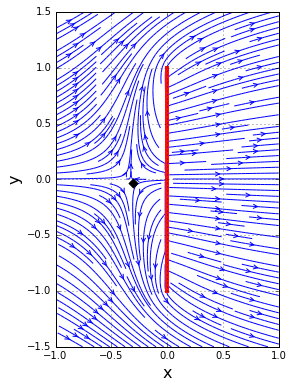

In [84]:
# plot streamlines
size = 4
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# plot source sheet
plt.axvline(0.0, (y_min - y_start)/(y_end - y_start), (y_max - y_start)/(y_end - y_start), color='#FF0D0D', linewidth=4)

# compute and plot stagnation point
mag = np.sqrt(u**2 + v**2)
j_stag, i_stag = np.unravel_index(mag.argmin(), mag.shape)

plt.scatter(x[i_stag], y[j_stag], color='black', s=40, marker='D')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end);